In [136]:
# Drew Lesh
# 11/11/25
# IBM Data Analyst Capstone Project - Data Visualization
# Scatter Plots

In [137]:
import pandas as pd
import matplotlib.pyplot as plt


In [138]:
# load data
df = pd.read_csv('survey_data.csv')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


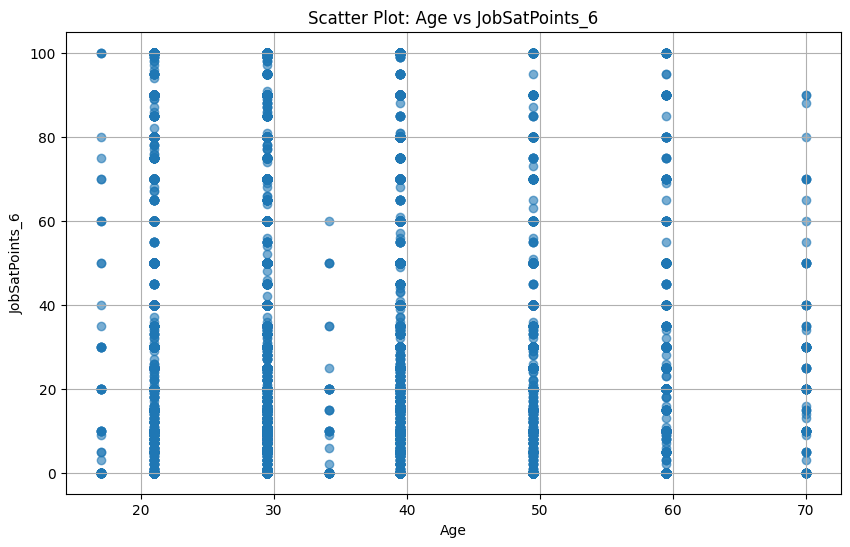

In [140]:
## Exploring Relationships with Scatter Plots
# 1. Scatter Plot for Age vs Job Satisfaction

# get data
df_1 = df[['Age','JobSatPoints_6']].copy()
#print(df_1['Age'].value_counts())

# Clean data
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_1['Age'] = df_1['Age'].map(age_map)

df_1 = df_1.dropna(subset=['JobSatPoints_6'])
df_1['Age'] = df_1['Age'].fillna(df_1['Age'].mean())
#df_1.isna().sum()

# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df_1['Age'], df_1['JobSatPoints_6'], alpha=0.6)
plt.title('Scatter Plot: Age vs JobSatPoints_6')
plt.xlabel('Age')
plt.ylabel('JobSatPoints_6')
plt.grid(True)
plt.show()

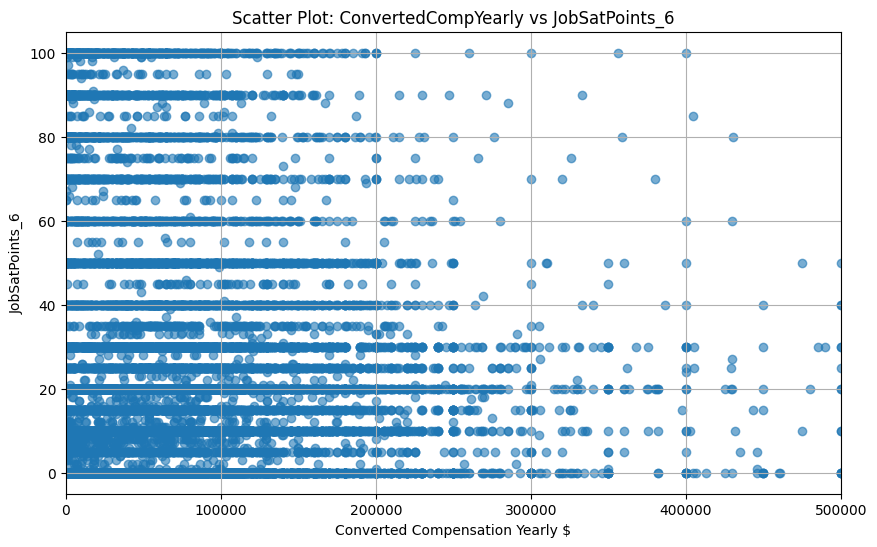

In [141]:
# 2. Scatter Plot of Compensation and Job Satisfaction

# Get Data
df_2 = df[['ConvertedCompYearly', 'JobSatPoints_6']].copy()

# Clean Data
df_2 = df_2.dropna()
df_2.describe()

#  Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df_2['ConvertedCompYearly'], df_2['JobSatPoints_6'], alpha=0.6)
plt.title('Scatter Plot: ConvertedCompYearly vs JobSatPoints_6')
plt.xlabel('Converted Compensation Yearly $')
plt.ylabel('JobSatPoints_6')
plt.xlim(0,500000)
plt.grid(True)
plt.show()

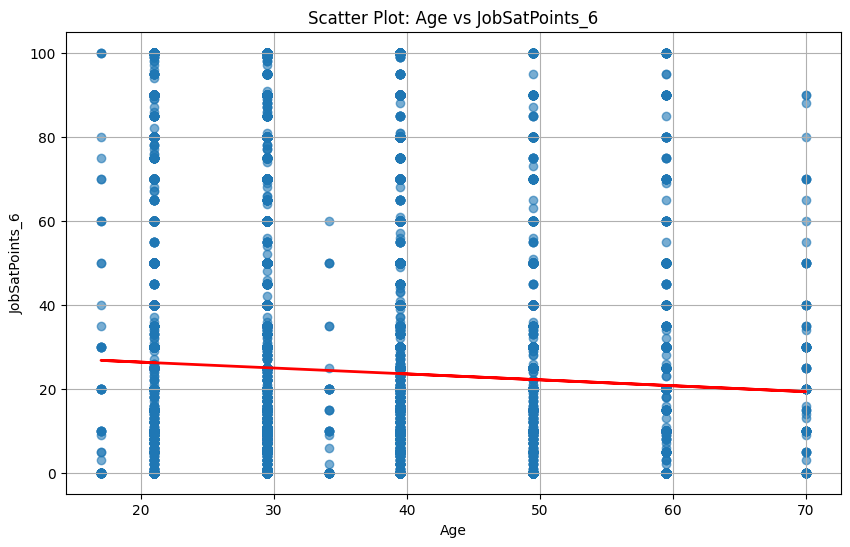

In [142]:
## Enhancing Scatter Plots
# 1. Scatter Plot with Trend Line for Age and Job Satisfaction

import numpy as np

# 3. Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df_1['Age'], df_1['JobSatPoints_6'], alpha=0.6)

slope, intercept = np.polyfit(df_1['Age'], df_1['JobSatPoints_6'], 1)
plt.plot(df_1['Age'], slope*df_1['Age']+intercept, color='red', linewidth=2, label='Trend Line')

plt.title('Scatter Plot: Age vs JobSatPoints_6')
plt.xlabel('Age')
plt.ylabel('JobSatPoints_6')
plt.grid(True)
plt.show()

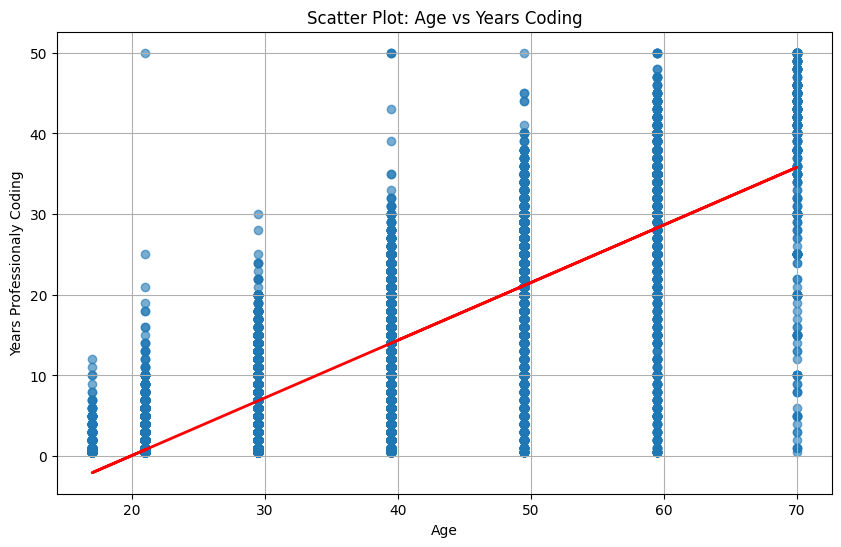

In [144]:
# 2. Scatter Plot for Age vs. Work Experience

# Get Data
df_3 = df[['Age', 'YearsCodePro']].copy()

# Clean Data
df_3['Age'] = df_3['Age'].map(age_map)

df_3['YearsCodePro'] = df_3['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
})
df_3['YearsCodePro'] = pd.to_numeric(df_3['YearsCodePro'], errors='coerce')
df_3 = df_3.dropna(subset=['Age', 'YearsCodePro'])

# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df_3['Age'], df_3['YearsCodePro'], alpha=0.6)

slope, intercept = np.polyfit(df_3['Age'], df_3['YearsCodePro'], 1)
plt.plot(df_3['Age'], slope*df_3['Age']+intercept, color='red', linewidth=2, label='Trend Line')

plt.title('Scatter Plot: Age vs Years Coding')
plt.xlabel('Age')
plt.ylabel('Years Professionaly Coding')
plt.grid(True)
plt.show()

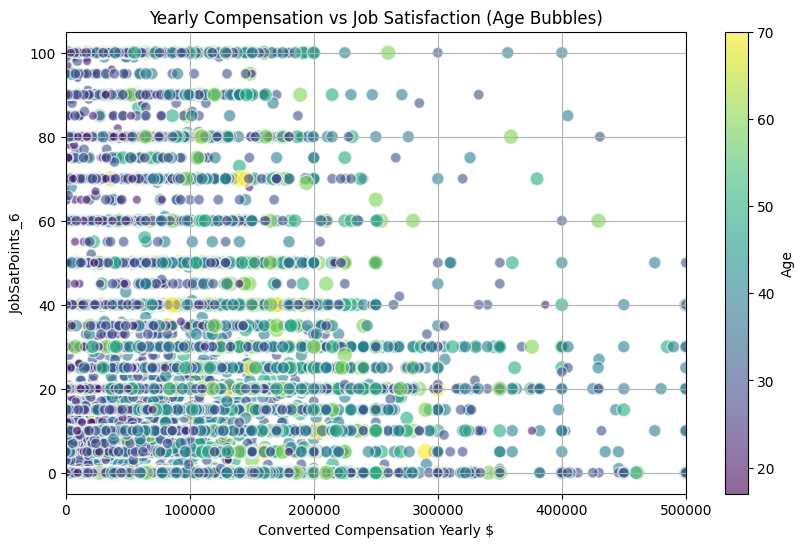

In [145]:
## Combining Scatter Plots with Additional Features
# 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size

# 1. GET DATA
df_4 = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].copy()

# 2. CLEAN DATA
df_4 = df_4.dropna()

age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_4['Age'] = df_4['Age'].map(age_map)
#print(df_4.isna().sum())

# 3. Scatter PLOT

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df_4['ConvertedCompYearly'],
    df_4['JobSatPoints_6'],
    s=df_4['Age']*2, # size multiplier for visibility
    c=df_4['Age'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)
plt.title('Yearly Compensation vs Job Satisfaction (Age Bubbles)')
plt.xlabel('Converted Compensation Yearly $')
plt.ylabel('JobSatPoints_6')
plt.xlim(0,500000)
plt.grid(True)
# Colorbar for a legend
cbar = plt.colorbar(scatter)
cbar.set_label('Age')
plt.show()

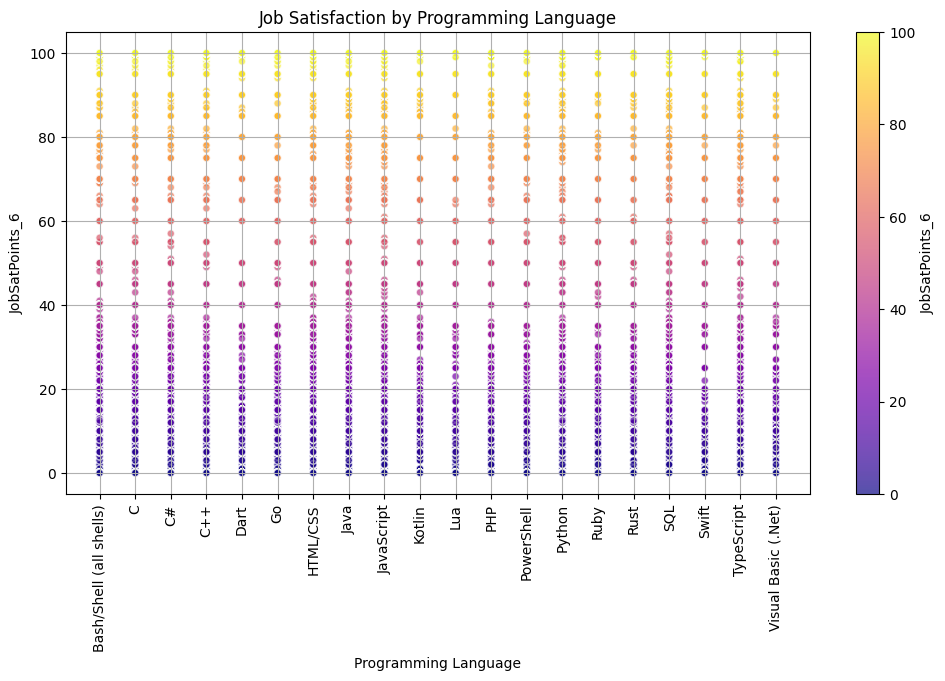

In [146]:
# 2. Scatter Plot for Popular Programming Languages by Job Satisfaction

df_5 = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].copy()
#print(df_5.isna().sum())

# 2. Clean Data
df_5 = df_5.dropna(subset=['LanguageHaveWorkedWith','JobSatPoints_6'])
#print(df_5.isna().sum())

# explode languages so theyre separate
df_5['LanguageHaveWorkedWith'] = df_5['LanguageHaveWorkedWith'].str.split(';')
df_5 = df_5.explode('LanguageHaveWorkedWith')
#df_5['LanguageHaveWorkedWith'].value_counts()

# get top 20 languages
top_langs = df_5['LanguageHaveWorkedWith'].value_counts().head(20).index
df_5 = df_5[df_5['LanguageHaveWorkedWith'].isin(top_langs)]

# convert languages to numeric
df_5['LanguageCode'] = df_5['LanguageHaveWorkedWith'].astype('category').cat.codes
lang_labels = df_5['LanguageHaveWorkedWith'].astype('category').cat.categories

# 3. Plot Data
plt.figure(figsize=(12,6))
scatter = plt.scatter(
    df_5['LanguageCode'],
    df_5['JobSatPoints_6'],
    c=df_5['JobSatPoints_6'],
    cmap='plasma',
    alpha=0.7,
    s=30,
    edgecolors='w'
)

cbar = plt.colorbar(scatter)
cbar.set_label('JobSatPoints_6')

plt.xticks(ticks=range(len(lang_labels)), labels=lang_labels, rotation=90)
plt.xlabel('Programming Language')
plt.ylabel('JobSatPoints_6')
plt.title('Job Satisfaction by Programming Language')
plt.grid(True)
plt.show()

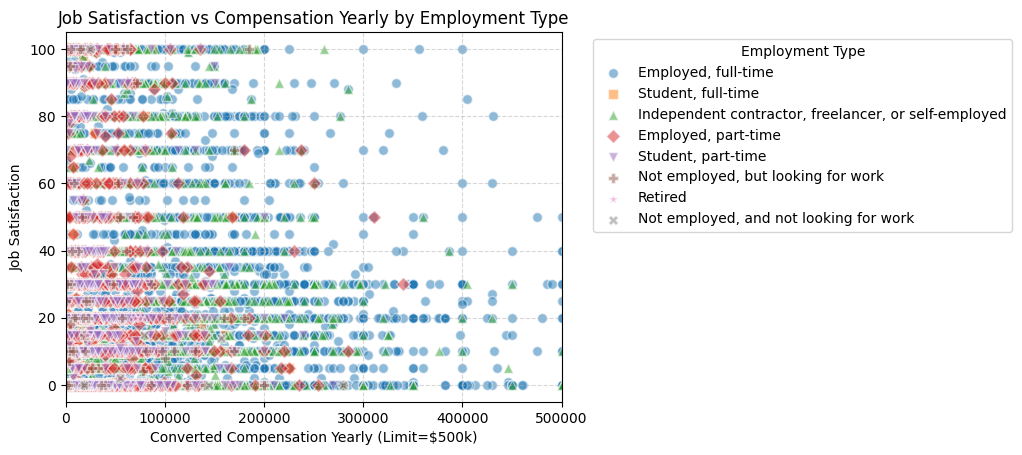

In [147]:
## Scatter Plot Comparisons Across Groups
# 1. Scatter Plot for Compensation vs Job Satisfaction by Employment Type

# Get Data
df_6 = df[['Employment', 'ConvertedCompYearly', 'JobSatPoints_6']].copy()

# Clean Data

    #### Drop NaN ####
df_6 = df_6.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])
#df_6.isna().sum()

    #### Explode Employment ####
df_6['Employment'] = df_6['Employment'].str.split(';')
df_6 = df_6.explode('Employment')
df_6['Employment'] = df_6['Employment'].str.strip()
#print(df_6['Employment'].value_counts())
#print(df_6['Employment'].isna().sum())
#print(df_6.isna().sum())

# Plot Data
emp_types = df_6['Employment'].unique()
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']
colors = plt.cm.tab10.colors

for i, emp_type in enumerate(emp_types):
    subset = df_6[df_6['Employment'] == emp_type]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        s=50,
        alpha=0.5,
        label=emp_type,
        marker=markers[i % len(markers)],
        color=colors[i % len(colors)],
        edgecolors='w'
    )
plt.xlim(0, 500000)
plt.xlabel('Converted Compensation Yearly (Limit=$500k)')
plt.ylabel('Job Satisfaction')
plt.title('Job Satisfaction vs Compensation Yearly by Employment Type')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

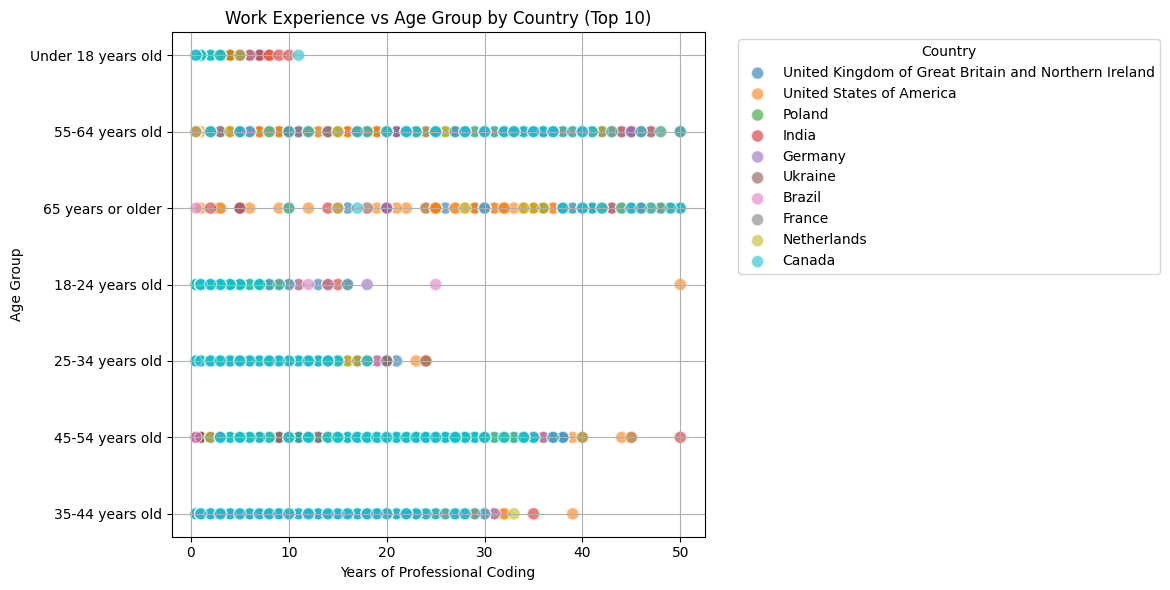

In [148]:
# 2. Scatter Plot for Work Experience vs Age Group by Country

######### PREP DATA #########

# Get Data
df_7 = df[['Age', 'YearsCodePro', 'Country']].copy()
#len(df_7)
#print(df_7.isna().sum())
#print(df_7['YearsCodePro'].value_counts())
#df_7.head()

# Map YearsCodePro to numeric
df_7['YearsCodePro'] = df_7['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
})
df_7['YearsCodePro'] = pd.to_numeric(df_7['YearsCodePro'], errors='coerce')

# Drop missing values from YearsCode Pro
# Fill missing Country values with mode
df_7 = df_7.dropna(subset=['YearsCodePro'])
df_7['Country'] = df_7['Country'].fillna(df_7['Country'].mode()[0])

# Drop 'Prefer not to say' age group
df_7 = df_7[df_7['Age'] != 'Prefer not to say']

# Keep only top 10 countries
top_countries = df_7['Country'].value_counts().head(10).index
df_7 = df_7[df_7['Country'].isin(top_countries)]


######### Set up Markers and Colors #########
# Age Groups as markers
age_groups = df_7['Age'].unique()
age_markers = ['o', 's', '^', 'D', 'v', 'P', '*']
age_map = {age: age_markers[i % len(age_markers)] for i, age in enumerate(age_groups)}

# Countries as colors
countries = df_7['Country'].unique()
#print(countries)
colors = plt.cm.tab10.colors
country_map = {country: colors[i % len(colors)] for i, country in enumerate(countries)}


######### Plot the Scatter Plot #########
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df_7[df_7['Country']==country]
    plt.scatter(
        subset['YearsCodePro'],
        subset['Age'],
        s=80,
        label=country,
        color=[country_map[country]]*len(subset),
        alpha=0.6,
        edgecolors='w',
    )

plt.xlabel('Years of Professional Coding')
plt.ylabel('Age Group')
plt.title('Work Experience vs Age Group by Country (Top 10)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()